In [4]:
# 傳回排序過的副本
L = [3, 1, 4, 1, 5, 9, 2, 6]
print(sorted(L))
print(L)

# 直接在原陣列中排序
L.sort()
print(L)

# 可迭代物件都可以使用
print(sorted("python"))

[1, 1, 2, 3, 4, 5, 6, 9]
[3, 1, 4, 1, 5, 9, 2, 6]
[1, 1, 2, 3, 4, 5, 6, 9]
['h', 'n', 'o', 'p', 't', 'y']


In [7]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))

print(x)
x.sort()
print(x)



[1 2 3 4 5]
[2 1 4 3 5]
[1 2 3 4 5]


In [8]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

# 使用fancy index
print(x[i])

[1 0 3 2 4]
[1 2 3 4 5]


In [9]:
rng = np.random.default_rng(seed=42)
x = rng.integers(0, 10, (4,6))
print(x)

# 沿著列移動 = 排序每一欄
print(np.sort(x, axis=0))

# 沿著欄移動 = 排序每一列
print(np.sort(x, axis=1))

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]
[[0 4 2 0 1 1]
 [0 6 5 3 4 8]
 [7 7 6 4 5 9]
 [8 7 7 7 5 9]]
[[0 4 4 6 7 8]
 [0 0 2 5 6 9]
 [1 5 7 7 7 7]
 [1 3 4 5 8 9]]


In [10]:
X = np.array([7, 2, 3, 1, 6, 5, 4])
print(np.partition(X, 3))

print(np.partition(x, 2, axis=1))

[1 2 3 4 5 6 7]
[[0 4 4 6 7 8]
 [0 0 2 5 6 9]
 [1 5 7 7 7 7]
 [1 3 4 5 8 9]]


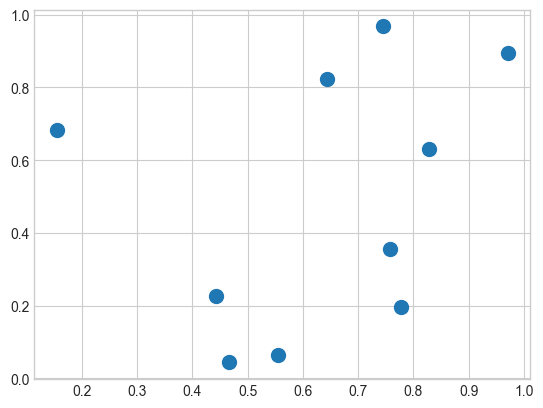

In [11]:
# 建立10個隨機資料點的集合 放在10 X 2 的陣列中
x = rng.random((10, 2))

# 劃出資料點分布圖
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(x[:,0], x[:,1], s=100)

In [24]:
# 算出每一對點之間的距離
# dist_sq = np.sum((x[:, np.newaxis]-x[np.newaxis, :] ** 2, axis=-1))

# 分解步驟
# 利用擴張取得每一對點的差值 (10,1,2)- (1, 10, 2)
differences = x[:, np.newaxis]-x[np.newaxis, :]
print(differences.shape)

# 取差值平方
sq_differences = differences ** 2
print(sq_differences.shape)

# 差值平方加總 取平方距離 -1 代表沿著最後一軸運算
dist_sq = sq_differences.sum(-1)
print(dist_sq.shape)

# 確認對角線都是零 (每一點與自己的運算結果)
print(dist_sq.diagonal())


(10, 10, 2)
(10, 10, 2)
(10, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# 取得每列排序的索引 第一欄會從0到9 因為自己跟自己一定是最近的
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


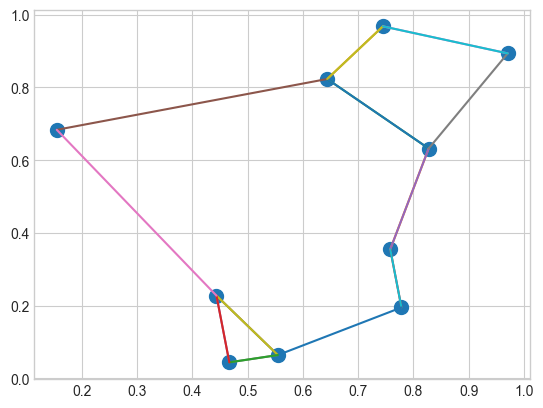

In [33]:
# 找與自己最近的2個點
k = 2
# k+1 因為最前面是自己 每列排序
nearest_partition = np.argpartition(dist_sq, k+1, axis = 1)

# 視覺化結果 (有些點有多條線 因為A跟B最近 不代表B也跟A最近)
plt.scatter(x[:,0], x[:,1], s=100)

k = 2

for i in range(x.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(x[j], x[i]))